# Bikes example with different values of $\alpha$ and $m$

In [1]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb
from pymc_bart.pgbart import compute_prior_probability

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
RANDOM_SEED = 4579
np.random.seed(RANDOM_SEED)
az.style.use("arviz-white")
plt.rcParams["figure.dpi"] = 300

## Biking with BART

In [3]:
bikes = pd.read_csv("bikes.csv")

X = bikes[["hour", "temperature", "humidity", "windspeed"]]
Y = bikes["count"]

In [4]:
trees = [10, 20, 50, 100, 200]
alphas = [0.1, 0.25, 0.5]
idatas_bikes = {
    "10": {"0.1": {}, "0.25": {}, "0.5": {}},
    "20": {"0.1": {}, "0.25": {}, "0.5": {}},
    "50": {"0.1": {}, "0.25": {}, "0.5": {}},
    "100": {"0.1": {}, "0.25": {}, "0.5": {}},
    "200": {"0.1": {}, "0.25": {}, "0.5": {}},
}

m_trees = {
    "10": {"0.1": {}, "0.25": {}, "0.5": {}},
    "20": {"0.1": {}, "0.25": {}, "0.5": {}},
    "50": {"0.1": {}, "0.25": {}, "0.5": {}},
    "100": {"0.1": {}, "0.25": {}, "0.5": {}},
    "200": {"0.1": {}, "0.25": {}, "0.5": {}},
}

In [6]:
for m in trees:
    for alpha in alphas:
        with pm.Model() as model_bikes:
            α = pm.Exponential("α", 0.1)
            μ_ = pmb.BART("μ_", X, np.log(Y), m=m, alpha=alpha)
            μ = pm.Deterministic("μ", np.exp(μ_))
            y = pm.NegativeBinomial("y", mu=μ, alpha=α, observed=Y)
            idata = pm.sample(
                tune=2000,
                draws=2000,
                chains=4,
                random_seed=RANDOM_SEED,
                compute_convergence_checks=False,
                idata_kwargs={"log_likelihood": True},
            )
            idatas_bikes[str(m)][str(alpha)] = idata
            m_trees[str(m)][str(alpha)] = μ_.owner.op.all_trees

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 29 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 33 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 39 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 48 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 55 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 68 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 104 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 122 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 152 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 198 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 235 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 294 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 390 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 464 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 585 seconds.


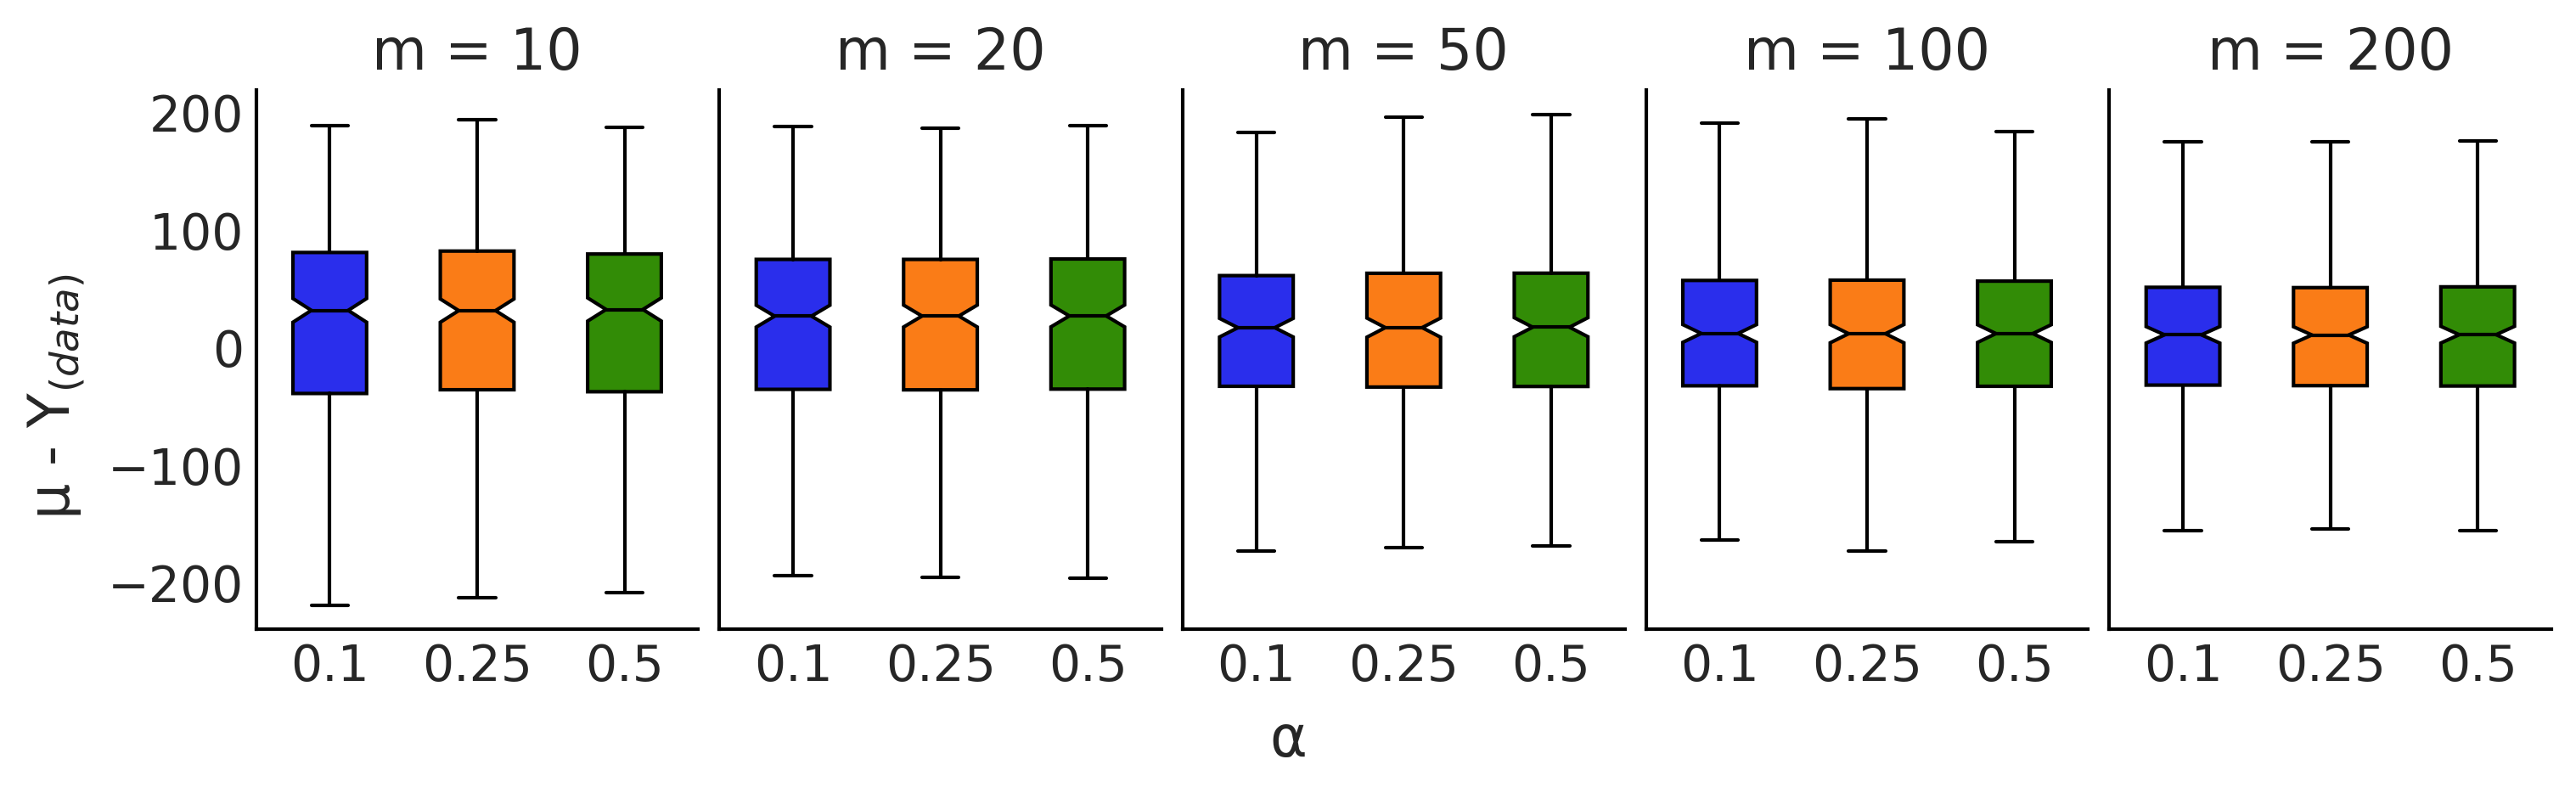

In [7]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3), sharey=True)

axes = axes.ravel()

for m, ax in zip(trees, axes):
    means = [
        idatas_bikes[str(m)][str(alpha)]["posterior"]["μ"].mean(("chain", "draw")) - Y
        for alpha in alphas
    ]
    box = ax.boxplot(
        means,
        notch=True,
        patch_artist=True,
        widths=0.5,
        labels=alphas,
        showfliers=False,
        medianprops=dict(color="k"),
    )
    for patch, color in zip(box["boxes"], ["C0", "C1", "C2", "C3"]):
        patch.set_facecolor(color)
        ax.set_title(f"m = {m}")

fig.supxlabel(r"α", fontsize=16)
fig.supylabel(r"μ - Y$_{(data)}$", fontsize=16)

plt.savefig("boxplots_bikes.png")

## PSIS-LOO-CV

In [8]:
model_compare = az.compare(
    {
        "m10": idatas_bikes["10"]["0.25"],
        "m20": idatas_bikes["20"]["0.25"],
        "m50": idatas_bikes["50"]["0.25"],
        "m100": idatas_bikes["100"]["0.25"],
        "m200": idatas_bikes["200"]["0.25"],
    }
)

/home/pablo/anaconda3/envs/bart-experiments/lib/python3.9/site-packages/arviz/stats/stats.py:1036: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
/home/pablo/anaconda3/envs/bart-experiments/lib/python3.9/site-packages/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/pablo/anaconda3/envs/bart-experiments/lib/python3.9/site-packages/arviz/stats/stats.py:1036: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
/home/pablo/anaconda3/envs/bart-experiments/lib/python3.9/site-packages/arviz/stats/stats.py

In [9]:
model_compare

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
m200,0,-1958.003907,26.649447,0.000000,1.000000e+00,24.007322,0.000000,False,log
m100,1,-1983.872873,33.688365,25.868966,7.267971e-10,24.146701,2.656344,True,log
m50,2,-2013.740250,40.241357,55.736343,4.851344e-10,24.502727,5.384590,True,log
m20,3,-2058.824993,51.011682,100.821087,1.952081e-10,24.802356,8.077507,True,log
m10,4,-2094.371443,60.994124,136.367536,0.000000e+00,24.872397,9.446158,True,log


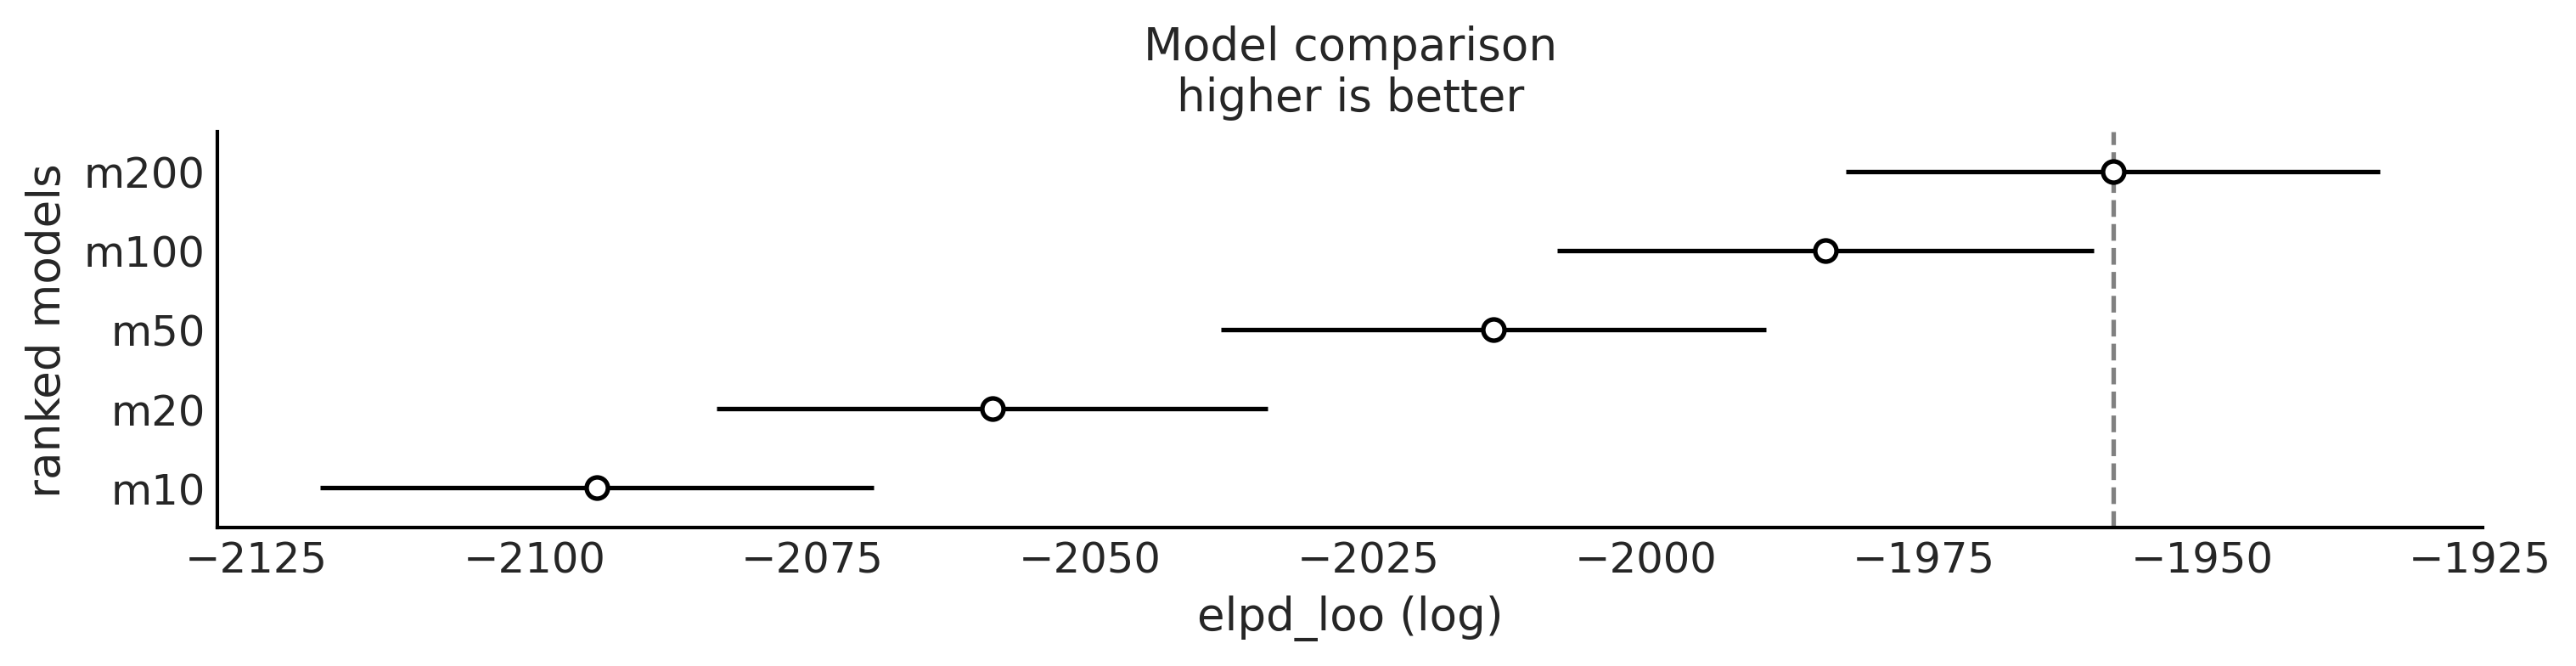

In [10]:
az.plot_compare(
    model_compare,
    plot_ic_diff=False,
    insample_dev=False,
    figsize=(10, 2.5),
    legend=False,
)
plt.savefig("loo_bikes-trees-alphas.png")

## Tree extraction  

In [11]:
trees_length = {
    "10": {"0.1": {}, "0.25": {}, "0.5": {}},
    "20": {"0.1": {}, "0.25": {}, "0.5": {}},
    "50": {"0.1": {}, "0.25": {}, "0.5": {}},
    "100": {"0.1": {}, "0.25": {}, "0.5": {}},
    "200": {"0.1": {}, "0.25": {}, "0.5": {}},
}

In [12]:
for m in trees:
    for alpha in alphas:
        tmp_list = []
        chain = m_trees[str(m)][str(alpha)]
        for sample in chain:
            for tree in sample:
                index = max(tree.tree_structure.keys())
                tmp_list.append(pmb.tree.get_depth(index))
        trees_length[f"{m}"][f"{alpha}"] = pd.Series(tmp_list)

In [13]:
# Trees' depth probabilities based on alpha values
prob_alphas = []
for alpha in alphas:
    q = compute_prior_probability(alpha)
    p = 1 - np.array(q)
    p = p / p.sum()
    prob_alphas.append(p)

### Frequency of trees depths

In [14]:
wd = 0.33
wd_lst = [0, wd, wd * 2]

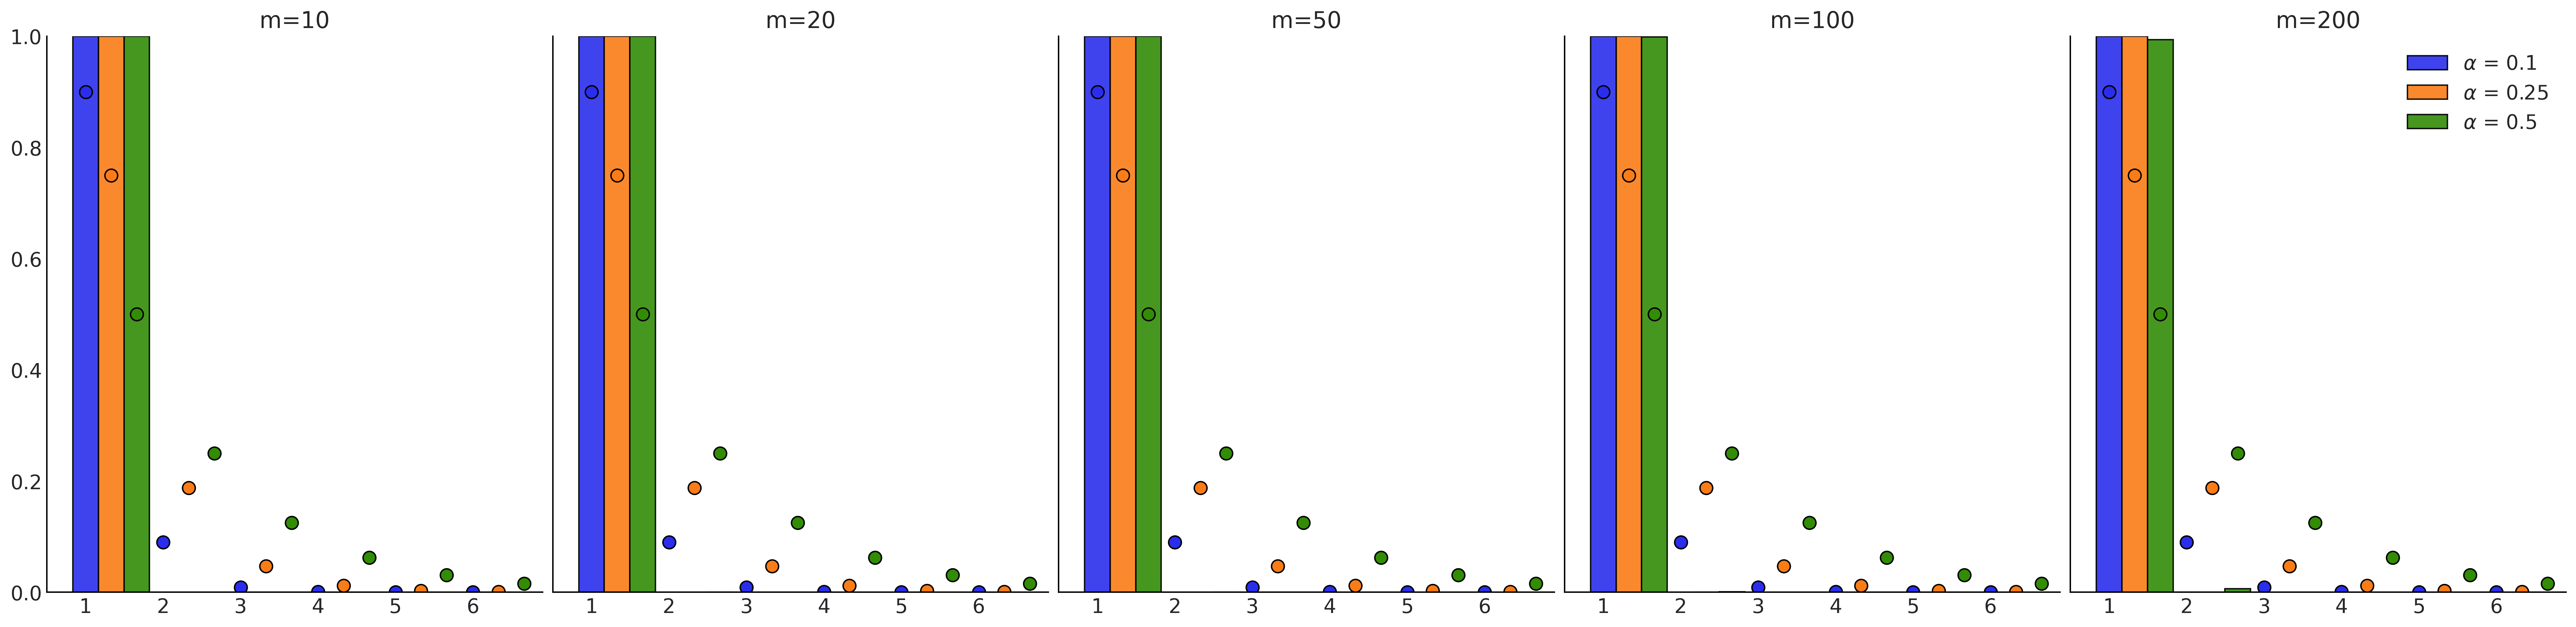

In [15]:
# All frequencies in one plot
fig, axes = plt.subplots(1, 5, figsize=(25, 6), sharey=True)

for m, ax in zip(trees, axes.ravel()):
    for i in range(len(alphas)):
        # Trees Depth Frequencies
        frequency = (
            trees_length[f"{m}"][f"{alphas[i]}"]
            .value_counts(normalize=True)
            .sort_index(ascending=True)
        )
        ax.bar(
            frequency.index + wd_lst[i],
            frequency.values,
            color=f"C{i}",
            width=wd,
            edgecolor="k",
            alpha=0.9,
            label=rf"$\alpha$ = {alphas[i]}",
        )
        # Probabilities
        x = np.array(range(1, len(prob_alphas[i]) + 1)) + wd_lst[i]
        ax.scatter(
            x,
            prob_alphas[i],
            facecolor=f"C{i}",
            edgecolor="k",
            marker="o",
            s=80,
            zorder=2,
        )

    major_ticks = np.arange(0, 7, 1)
    ax.set_xticks(major_ticks)
    ax.set_ylim(0, 1)
    ax.set_xlim(0.5, 6.9)
    ax.set_title(f"m={m}")
    if m == 200:
        ax.legend()

plt.savefig("bikes_trees_alphas_hist.png");